In [99]:
# Import packages
import CS373_coin_detection_extension as cs373
import imageIO.png
from matplotlib import pyplot
from matplotlib.patches import Rectangle

## Load image

In [100]:
image_name = 'easy_case_1'
input_filename = f'../Images/easy/{image_name}.png'

(image_width, image_height, px_array_r, px_array_g, px_array_b) = cs373.readRGBImageToSeparatePixelArrays(input_filename)

original_image = [px_array_r, px_array_g, px_array_b]

read image width=387, height=371


## Task 1 Converts images to greyscale and normalize
![Task1 demo](资料/task1_img1.png)
    

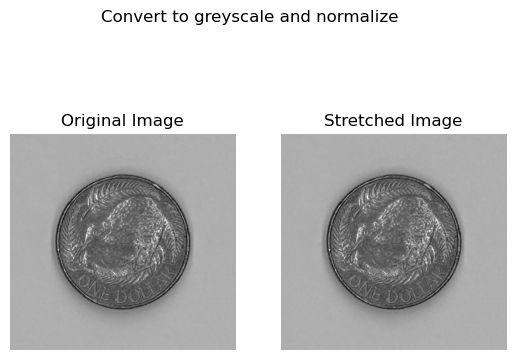

In [101]:
grey_scale_image = cs373.convert_RGB_to_Grayscale(px_array_r, px_array_g, px_array_b, image_width, image_height)
stretched_image = cs373.percentile_based_mapping(grey_scale_image, image_width, image_height)
cs373.plot_task_1(grey_scale_image, stretched_image)

## Task 2 Edge detection
Apply a 3x3 Scharr filter in x- and y-directions independently and take the absolute value of the difference between the results.
\begin{array}{cc}
scharr\_x: & scharr\_y: \\
\begin{bmatrix}
-3 & 0 & 3 \\
-10 & 0 & 10 \\
-3 & 0 & 3
\end{bmatrix} 
&
\begin{bmatrix}
-3 & -10 & -3 \\
0 & 0 & 0 \\
3 & 10 & 3
\end{bmatrix}\\
\end{array}

![Task2 demo](资料/task2_img1.png)

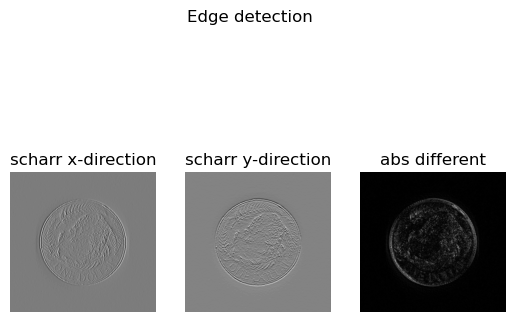

In [102]:
scharr_x = [[-3, 0, 3], [-10, 0, 10], [-3, 0, 3]]
scharr_y = [[-3, -10, -3], [0, 0, 0], [3, 10, 3]]

scharr_x = cs373.apply_filter(stretched_image, image_width, image_height,  scharr_x)
scharr_y = cs373.apply_filter(stretched_image, image_width, image_height,  scharr_y)
abs_diff = cs373.abs_diff(scharr_x, scharr_y)
cs373.plot_task_2(scharr_x, scharr_y, abs_diff)

## Task 3 Image Blurring
Apply 5x5 mean filter(s) to image.
- try applying the filter one or two times
\begin{array}{cc}
5\times5\ mean\ filter: \\
\frac{1}{25} \times
\begin{bmatrix}
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
1 & 1 & 1 & 1 & 1 \\
\end{bmatrix} 
\end{array}

![Task3 demo](资料/task3_img1.png)


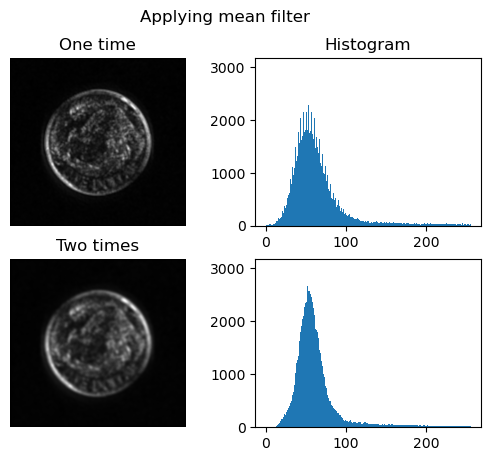

In [103]:
mean_filter_5x5 = [[0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04],
                   [0.04, 0.04, 0.04, 0.04, 0.04]]

blurred_image_1 = cs373.apply_filter(abs_diff, image_width, image_height, mean_filter_5x5)
blurred_image_2 = cs373.apply_filter(blurred_image_1, image_width, image_height, mean_filter_5x5)
blurred_image_2 = cs373.apply_filter(blurred_image_2, image_width, image_height, mean_filter_5x5)
cs373.plot_task_3(blurred_image_1, blurred_image_2)

## Task 4 Threshold the Image
Using thresholding to segment the coin(s) from the black background. Then we get a binary image.

![Task4 demo](资料/task4_img1.png)

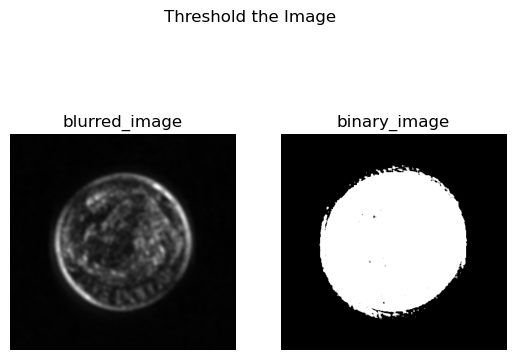

In [104]:
binary_image = cs373.custom_threshold(blurred_image_1, image_width, image_height, 180, 200)
cs373.plot_task_4(blurred_image_2, binary_image)

## Task 5 Erosion and Dilation
Perform several dilation steps followed by several erosion steps.
- use circular 5x5 kernel
- try to perform dilation 2-3 times first, and then erosion 3-4 times
                       
\begin{array}{cc}
circular\ 5\times5\ kernel: \\
\begin{bmatrix}
0 & 0 & 1 & 0 & 0 \\
0 & 1 & 1 & 1 & 0 \\
1 & 1 & 1 & 1 & 1 \\
0 & 1 & 1 & 1 & 0 \\
0 & 0 & 1 & 0 & 0 \\
\end{bmatrix} 
\end{array}

![Task5 demo](资料/task5_img1.png)

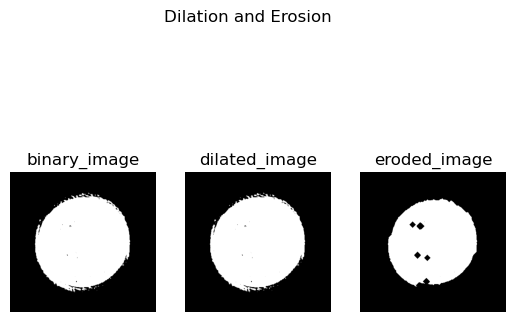

In [105]:
circular_kernel = [[0, 0, 1, 0, 0],
                   [0, 1, 1, 1, 0],
                   [1, 1, 1, 1, 1],
                   [0, 1, 1, 1, 0],
                   [0, 0, 1, 0, 0]]

dilated_image = cs373.dilate_image(binary_image, image_width, image_height, circular_kernel, iterations=2)
eroded_image = cs373.erode_image(dilated_image, image_width, image_height, circular_kernel, iterations=4)
cs373.polt_task_5(binary_image, dilated_image, eroded_image)

## Task 6 Connected Component Analysis
Perform a connected component analysis to find all connected components.
After erosion and dilation, you may find there are still some holes in the binary image. That is fine, as long as it is one connected component.

In [106]:
regions = cs373.computeConnectedComponentLabeling(eroded_image, image_width, image_height)

## Task 7 Draw Bounding Box
Looping over the image and looking for the minimum and maximum x and y coordinates of the pixels in the previously determined connected components.
- Add x_cor and y_cor to the bounding_box_list

![Task7 demo](资料/task7_img1.png)


In [107]:
bounding_box_list = cs373.detect_the_region(regions)


Start detect the region from the image...
The region has been detected from the image! 


## Draw image with boundary box

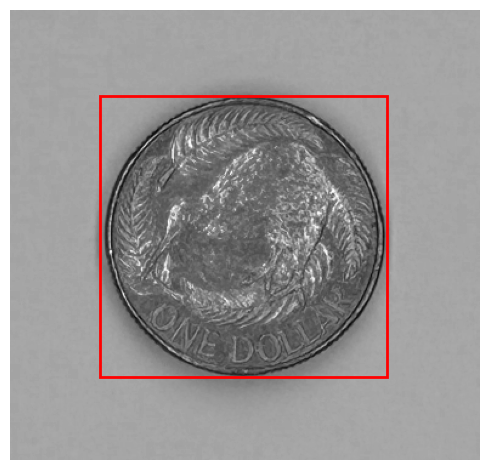

In [108]:
px_array = px_array_r

fig, axs = pyplot.subplots(1, 1)
axs.imshow(px_array, aspect='equal')

# Loop through all bounding boxes
for bounding_box in bounding_box_list:
    bbox_min_x = bounding_box[0]
    bbox_min_y = bounding_box[1]
    bbox_max_x = bounding_box[2]
    bbox_max_y = bounding_box[3]

    bbox_xy = (bbox_min_x, bbox_min_y)
    bbox_width = bbox_max_x - bbox_min_x
    bbox_height = bbox_max_y - bbox_min_y
    rect = Rectangle(bbox_xy, bbox_width, bbox_height, linewidth=2, edgecolor='r', facecolor='none')
    axs.add_patch(rect)

pyplot.axis('off')
pyplot.tight_layout()

# Show image with bounding box on the screen
pyplot.imshow(px_array, cmap='gray', aspect='equal')
pyplot.show()